# Data cleansing

First of all, I opened the .csv file as a Pandas dataframe using pd.read_csv and explored the dataframe using df.head(), df.tail() and df.info() methods

In [ ]:
#create a dataframe from a csv file

import pandas as pd

df_ranking_list = pd.read_csv('leaderboard2023-12-11.csv')

In [3]:
df_ranking_list.head()


,Pos.,Name,BOF number,Club,YOB,M/F,Average,Points,Contributing scores,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Nathan Lawson,369664,OD,1997,M,1399,8517,1413,1415.0,1420.0,1424.0,1422.0,1423.0
1,2,Ben Mitchell,233293,SBOC,1993,M,1390,8482,1400,1468.0,1411.0,1401.0,1405.0,1397.0
2,3,Alexander Chepelin,449661,INT,1997,M,1404,8480,1436,1412.0,1418.0,1404.0,1406.0,1404.0
3,4,Matthew Gooch,471453,EUOC,2002,M,1391,8472,1430,1404.0,1414.0,1403.0,1407.0,1414.0
4,5,Graham Gristwood,444751,FVO,1984,M,1399,8468,1402,1416.0,1407.0,1405.0,1411.0,1427.0


In [4]:
df_ranking_list.tail()


,Pos.,Name,BOF number,Club,YOB,M/F,Average,Points,Contributing scores,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
5006,5007,Paul Garton,232011,NOR,1950,M,180,180,180,NaN,NaN,NaN,NaN,NaN
5007,5008,Andrew Beldowski,150171,WSX,1929,M,47,94,38,56.0,NaN,NaN,NaN,NaN
5008,5009,Sarah Parish,126464,TVOC,1953,F,92,92,92,NaN,NaN,NaN,NaN,NaN
5009,5010,Patrick Davey,425031,MAROC,1940,M,44,44,44,NaN,NaN,NaN,NaN,NaN
5010,5011,Victoria GARTON,673062,MV,1979,F,15,29,4,25.0,NaN,NaN,NaN,NaN


In [5]:
df_ranking_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pos.                 5011 non-null   int64  
 1   Name                 5011 non-null   object 
 2   BOF number           5011 non-null   int64  
 3   Club                 5009 non-null   object 
 4   YOB                  5011 non-null   int64  
 5   M/F                  5011 non-null   object 
 6   Average              5011 non-null   int64  
 7   Points               5011 non-null   int64  
 8   Contributing scores  5011 non-null   int64  
 9   Unnamed: 9           4323 non-null   float64
 10  Unnamed: 10          3849 non-null   float64
 11  Unnamed: 11          3495 non-null   float64
 12  Unnamed: 12          3154 non-null   float64
 13  Unnamed: 13          2870 non-null   float64
dtypes: float64(5), int64(6), object(3)
memory usage: 548.2+ KB


It can be seen that dataframe has 14 columns ‘Pos’, ‘Name’, ‘BOF number’, ‘Club’, ‘YOB’, ‘M/F’, ‘Average’, ‘Points’, ‘Contributing scores’, ‘Unnamed: 9’, ‘Unnamed: 10’, ‘Unnamed: 11’, ‘Unnamed: 12’ and ‘Unnamed: 13’. There are 5011 entries in total, and many columns have missing values. 

In [6]:
# To beging my data cleansing, I set the index into ranking position

df_ranking_list = df_ranking_list.set_index('Pos.')

In [7]:
#Next, I renamed ‘Unnamed: x’ columns as ‘score x’:
    
df_ranking_list = df_ranking_list.rename(columns = {'Contributing scores': 'score 1','Unnamed: 9' : 'score 2','Unnamed: 10' : 'score 3','Unnamed: 11' : 'score 4', 'Unnamed: 12' : 'score 5', 'Unnamed: 13' : 'score 6'})

‘Name’ column within the original dataframe contains full names. I split the original ‘Name’ column into ‘First name’ and ‘Last name’ columns using ‘ ‘ as the separator. This produced three new colums; namely ‘First Name’,’sep’ and ‘Last Name’. I then removed the original ‘Name’ column as well as the ‘sep’ column created upon splitting the original name column from the dataframe. I also moved the ‘First name’ and ‘Last name’ columns that I created in the previous step to columns 2 and 3:

In [8]:
#split the name column to First name and Last name

df_ranking_list[['First Name','sep', 'Last Name']] = df_ranking_list.Name.str.rpartition(sep=' ', expand=True)

In [9]:
#remove original name column as well as 'sep' column created in previous step

df_ranking_list = df_ranking_list.drop(['Name', 'sep'], axis=1)

# move First name and last name columns to 2nd and 3rd positions

df_ranking_list = df_ranking_list.reindex(columns=['First Name', 'Last Name', 'BOF number', 'Club', 'YOB', 'M/F', 'Average', 'score 1', 'score 2','score 3', 'score 4', 'score 5', 'score 6'])

df_ranking_list.head()

,First Name,Last Name,BOF number,Club,YOB,M/F,Average,score 1,score 2,score 3,score 4,score 5,score 6
Pos.,,,,,,,,,,,,,
1,Nathan,Lawson,369664,OD,1997,M,1399,1413,1415.0,1420.0,1424.0,1422.0,1423.0
2,Ben,Mitchell,233293,SBOC,1993,M,1390,1400,1468.0,1411.0,1401.0,1405.0,1397.0
3,Alexander,Chepelin,449661,INT,1997,M,1404,1436,1412.0,1418.0,1404.0,1406.0,1404.0
4,Matthew,Gooch,471453,EUOC,2002,M,1391,1430,1404.0,1414.0,1403.0,1407.0,1414.0
5,Graham,Gristwood,444751,FVO,1984,M,1399,1402,1416.0,1407.0,1405.0,1411.0,1427.0


Next, it was time to have a closer look at the data. The dataframe contained 5011 rows. However, many of the columns contained null values. Therefore, the next step was to replace any NaN values with 0. However, upon reflection, it would have made more sense to replace the two missing ‘club’ entries as ‘Not known’ instead of 0! I will return to this later…

In [10]:
#core 3, score 4, score 5 and score 6 columns. Replace NaN with 0

df_ranking_list.fillna(0, inplace=True)
print (df_ranking_list.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 1 to 5011
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   First Name  5011 non-null   object 
 1   Last Name   5011 non-null   object 
 2   BOF number  5011 non-null   int64  
 3   Club        5011 non-null   object 
 4   YOB         5011 non-null   int64  
 5   M/F         5011 non-null   object 
 6   Average     5011 non-null   int64  
 7   score 1     5011 non-null   int64  
 8   score 2     5011 non-null   float64
 9   score 3     5011 non-null   float64
 10  score 4     5011 non-null   float64
 11  score 5     5011 non-null   float64
 12  score 6     5011 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 548.1+ KB
None


Next, I checked for any obvious outliers as well as the statistical distributions for the data within the different columns using the `df.describe()` method. The statistics for ‘BOF number’ are not expected to follow any statistical distributions because the column contains the British Orienteering membership number for each ranked orienteer. Juniors will score ranking points from the January of the year when they turn 16, and that is reflected on the maximum for year of birth, ‘YOB’, at 2007. The oldest ranked orienteer was born in 1929, it’s pretty inspirational to think there is a 94-year-old out there enjoying the very inclusive sport of orienteering!

In [11]:
#Check for outliers in the data. It all looks sensible, so we're good to go with data analysis

df_ranking_list.describe()

,BOF number,YOB,Average,score 1,score 2,score 3,score 4,score 5,score 6
count,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,333155.178208,1970.482938,997.326282,1017.528837,890.831571,801.544402,735.596288,669.105169,614.242067
std,210497.116762,17.482534,192.640019,200.136656,397.451553,468.310713,505.888946,530.972008,545.083593
min,100007.000000,1929.000000,15.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166162.500000,1957.000000,885.000000,903.000000,822.000000,636.500000,0.000000,0.000000,0.000000
50%,279374.000000,1967.000000,1016.000000,1041.000000,1015.000000,992.000000,967.000000,934.000000,879.000000
75%,440001.500000,1982.000000,1134.000000,1159.000000,1148.500000,1137.000000,1131.000000,1120.000000,1112.000000
max,998858.000000,2007.000000,1407.000000,1436.000000,1468.000000,1420.000000,1424.000000,1422.000000,1427.000000


# Exploratory data analysis

To start my exploratory data analysis, I wanted to calculate the age of each ranked orienteer from their year of birth (‘YOB’). To achieve this, I imported `datetime` module, and created a variable Current_year using `datetime.datetime.now().year` method. I then created a new column ‘age’ in my dataframe by subtracting the year of birth from the current year.

In [12]:

import datetime
Current_Year = datetime.datetime.now().year
df_ranking_list['age'] = Current_Year - df_ranking_list['YOB']

I then wanted to find out the age distribution of the ranked orienteers. For returning each unique age within the data I used `df['column'].unique()` method together with sorted() function.

In [13]:
#find unique ages within the age column

ages_unique_sorted = sorted(df_ranking_list['age'].unique())

I then used `matplotlib` to plot the age distribution of the ranked orienteers. I think we need some more youngsters in the sport as there is a distinct plateau in the number of ranked orienteers between ages 20 and 40! This may partly be due to orienteers of this age having young families, and hence being less likely to get out there in the wildest of British weathers!


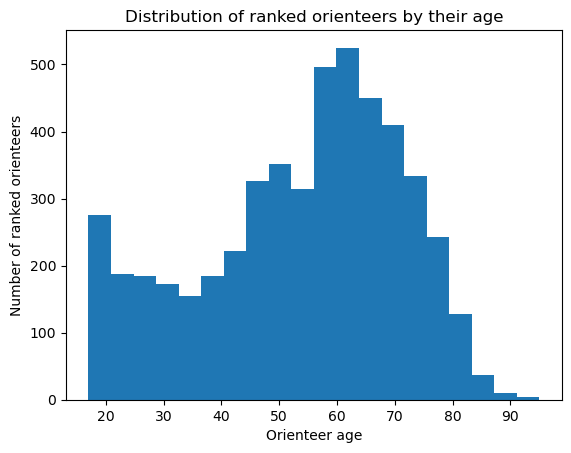

In [14]:
import matplotlib.pyplot as plt

plt.hist(x = 'age', data = df_ranking_list, bins = 20)
plt.xlabel("Orienteer age")
plt.ylabel("Number of ranked orienteers")
plt.title('Distribution of ranked orienteers by their age')
plt.show()

I then wanted to see whether the distribution of ranked orienteers was similar for both males and females. To achieve this, I created two variables, ‘males’ and ‘females’, where I applied a filter to return only the rows where [‘M/F’] equals ‘M’ and ‘F’, respectively. I then plotted the histogram. The distributions look very similar for both genders in terms of their overall shape. However, the numbers of ranked female orienteers are lower across all the age classes than the number of ranked males.

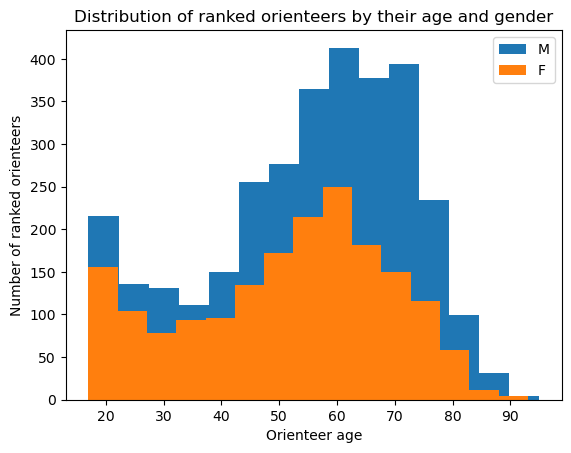

In [81]:
#print a histogram of the age distrbution of orienteers on the ranking list by gender

males = df_ranking_list.loc[df_ranking_list['M/F']=='M', 'age']
females = df_ranking_list.loc[df_ranking_list['M/F']=='F', 'age']

plt.hist(males,  label='M', bins = 15)
plt.hist(females,  label='F', bins = 15)
plt.xlabel("Orienteer age")
plt.ylabel("Number of ranked orienteers")
plt.legend()
plt.title('Distribution of ranked orienteers by their age and gender')
plt.show()

Next, I wanted to explore the maximum ranking score for each unique age within the ranking list to see what the peak performance age for orienteers was. It can be seen that orienteers up to approximately 40-years-old are evenly matched before the maximum average ranking score for each unique age starts to decrease. As could be expected, the older age groups have noticeably lower maximum average ranking scores for each unique age. 

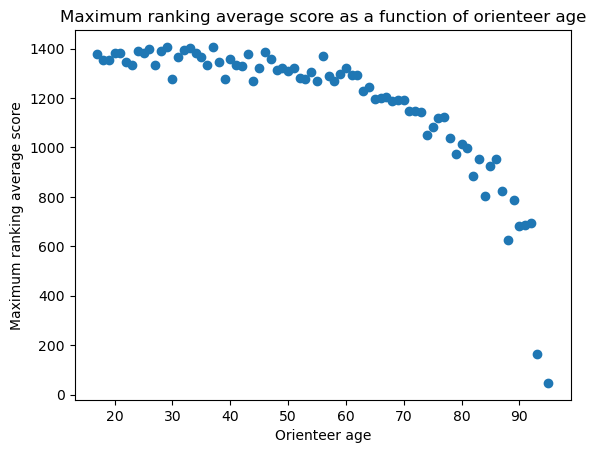

In [16]:
# plot the maximum average for each age

x = (df_ranking_list['age'].unique())
y = df_ranking_list.groupby('age')['Average'].max()
plt.scatter(x, y)
plt.xlabel('Orienteer age')
plt.ylabel('Maximum ranking average score')
plt.title('Maximum ranking average score as a function of orienteer age')
plt.show()

I then split the dataset between males and females to see if top female orienteers at any age outperformed the top male orienteers. As shown by the graph below, males generally scored higher maximum average ranking scores than females across all the ages. 

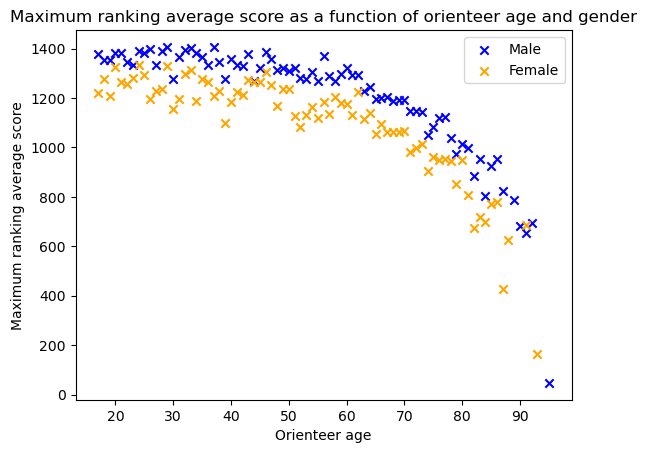

In [90]:
# plot the maximum average for each age grouped by gender

x = df_ranking_list['age'].unique()
gender_max = df_ranking_list.groupby(['age', 'M/F'])['Average'].max().unstack() 

plt.scatter(x, gender_max['M'], label='Male', marker='x', c='blue')
plt.scatter(x, gender_max['F'], label='Female', marker='x', c='orange')

plt.xlabel('Orienteer age')
plt.ylabel('Maximum ranking average score')
plt.title('Maximum ranking average score as a function of orienteer age and gender')
plt.legend()
plt.show()


Next I wanted to have a look at the distribution of average ranking scores across the entire dataset. A histogram with the distribution of scores is shown below. The distribution follows a Bell curve, with a slight tail towards the lower scores. Some of these lower scores can possibly be attributed to the older ranked orienteers. 

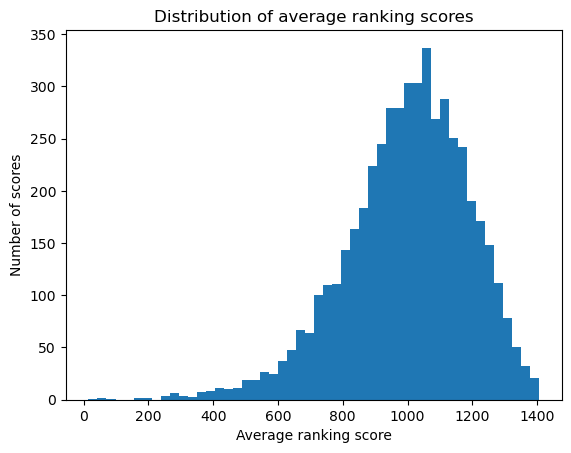

In [18]:
# plot the distribution of average ranking scores
plt.hist(x = 'Average', data = df_ranking_list, bins = 50)
plt.xlabel("Average ranking score")
plt.ylabel("Number of scores")
plt.title('Distribution of average ranking scores')
plt.show()

To explore if it was justifiable to exclude any of the values from the tail in the lower end of the ranking scores I calculated the statistical descriptors for the distribution of average ranking scores. I used `f’strings` and limited the decimal places to two in my output from the code.

In [ ]:
#calculate the mean of the average ranking scores

from scipy import stats
Mean_average = df_ranking_list.Average.mean()
print (f' The mean average ranking score is {Mean_average:.2f} points')

#calculate the median of the average ranking scores
Median_average = df_ranking_list.Average.median()
print (f' The median average ranking score is {Median_average:.2f} points')

# calculate the mode of the average ranking scores
Mode_average = df_ranking_list.Average.mode()
print (f' The mode for average ranking score is {Mode_average} points')

 The mean average ranking score is 997.33 points
 The median average ranking score is 1016.00 points
 The mode for average ranking score is 0    1040
Name: Average, dtype: int64 points


In [20]:
#calculate standard deviation for average ranking score
Std_average = df_ranking_list.Average.std()
print (f' The standard deviation for average ranking score is {Std_average:.2f} points')

 The standard deviation for average ranking score is 192.64 points


I then calculated the standard deviation for the average ranking score, and used six sigma as a justification to exclude any values that were more than three times the standard deviation smaller than the average. It can be seen that the dataframe has 4964 rows, meaning 47 entries were excluded as outliers. 

In [21]:
#calculate limits for excluding outliers using 3 std
Three_std = 3*Std_average
Lower_limit = Mean_average - Three_std
Upper_limit = Mean_average + Three_std

print(f'Any values smaller than {Lower_limit:.2f} or larger than {Upper_limit:.2f} can be considered as outliers')

#filter out outliers
df_ranking_list_filtered = df_ranking_list[df_ranking_list['Average'] >= 419.41]
df_ranking_list_filtered

Any values smaller than 419.41 or larger than 1575.25 can be considered as outliers


,First Name,Last Name,BOF number,Club,YOB,M/F,Average,score 1,score 2,score 3,score 4,score 5,score 6,age
Pos.,,,,,,,,,,,,,,
1,Nathan,Lawson,369664,OD,1997,M,1399,1413,1415.0,1420.0,1424.0,1422.0,1423.0,27
2,Ben,Mitchell,233293,SBOC,1993,M,1390,1400,1468.0,1411.0,1401.0,1405.0,1397.0,31
3,Alexander,Chepelin,449661,INT,1997,M,1404,1436,1412.0,1418.0,1404.0,1406.0,1404.0,27
4,Matthew,Gooch,471453,EUOC,2002,M,1391,1430,1404.0,1414.0,1403.0,1407.0,1414.0,22
5,Graham,Gristwood,444751,FVO,1984,M,1399,1402,1416.0,1407.0,1405.0,1411.0,1427.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,Sophie,Battistini,371472,BOF,1977,F,466,466,0.0,0.0,0.0,0.0,0.0,47
4981,Alex,Escudero,102260,SOC,1973,M,444,444,0.0,0.0,0.0,0.0,0.0,51
4982,Janet,Livingstone,777105,NWO,1955,F,442,442,0.0,0.0,0.0,0.0,0.0,69


# Data visualisation

Now that I was dealing with a clean dataset with outliers removed, it was time to start visualising the data in more detail. First of all, I plotted the distribution of average ranking scores in `Seaborn`.

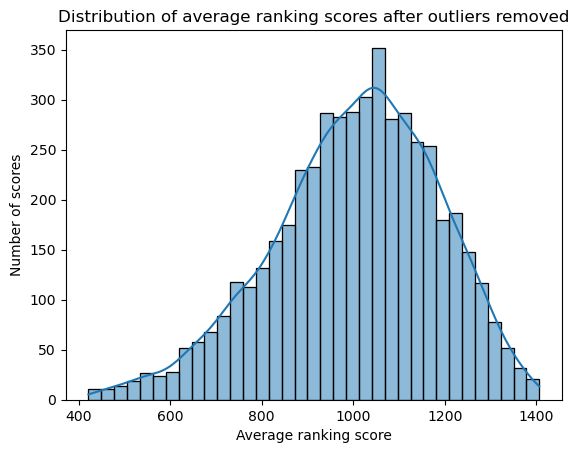

In [22]:
#plot the histogram with line graph again with the outliers excluded
import seaborn as sns

sns.histplot(df_ranking_list_filtered.Average, kde=True)
plt.xlabel("Average ranking score")
plt.ylabel("Number of scores")
plt.title('Distribution of average ranking scores after outliers removed')
plt.show()


I then wanted to look at the mean average ranking score by club. Here I needed to remove the entries where ‘Club’ was ‘0’ – you may remember that I had changed all NaN values to 0 earlier on in the process. Had I changed it to ‘Not known’ or another string, I could have still plotted the values on the graph, a valuable learning experience! A graph of the mean average ranking score by club is shown below. There are approximately ten clubs with higher mean average ranking scores, followed by a gradual decrease in the mean average ranking score for the rest of the clubs. 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


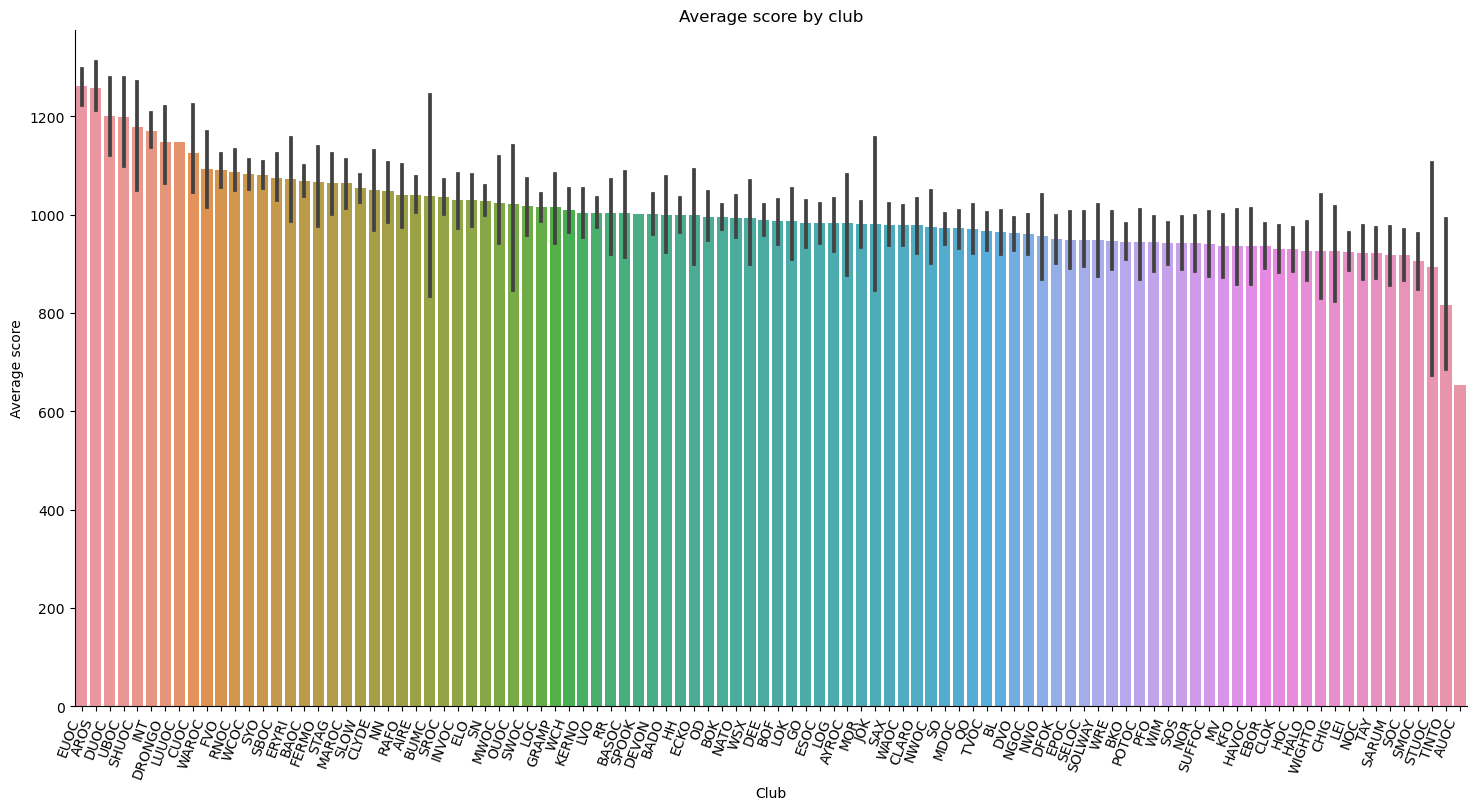

In [23]:
#There is an entry in the graph with club name '0'. Find the entry and remove it from the dataframe
df_zero_clubs_removed = df_ranking_list.loc[df_ranking_list['Club'] != 0]

#replot the graph with the cleaned dataframe

sns.catplot(data=df_zero_clubs_removed,
            x="Club",
            y="Average",
            kind="bar",
            order = df_zero_clubs_removed.groupby('Club')['Average'].mean().sort_values(ascending=False).index,
           height=7.5,
           aspect=2)
plt.xlabel("Club")
plt.ylabel("Average score")
plt.title('Average score by club')
plt.xticks(rotation=70, fontsize = 10, ha="right")
plt.show()


The figure above is useful for visualising the general trend in the mean average scores for each club, but contains too much information to be legible on the x-axis to find out which clubs are the top performing clubs. Therefore, I repeated the same graph but this time only plotted the top-25 clubs. It can be seen that eight out of the top-ten clubs are either university clubs or university alumni clubs. It could be assumed that the runners in these clubs are younger, and therefore perhaps fitter, scoring higher average raking points. 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


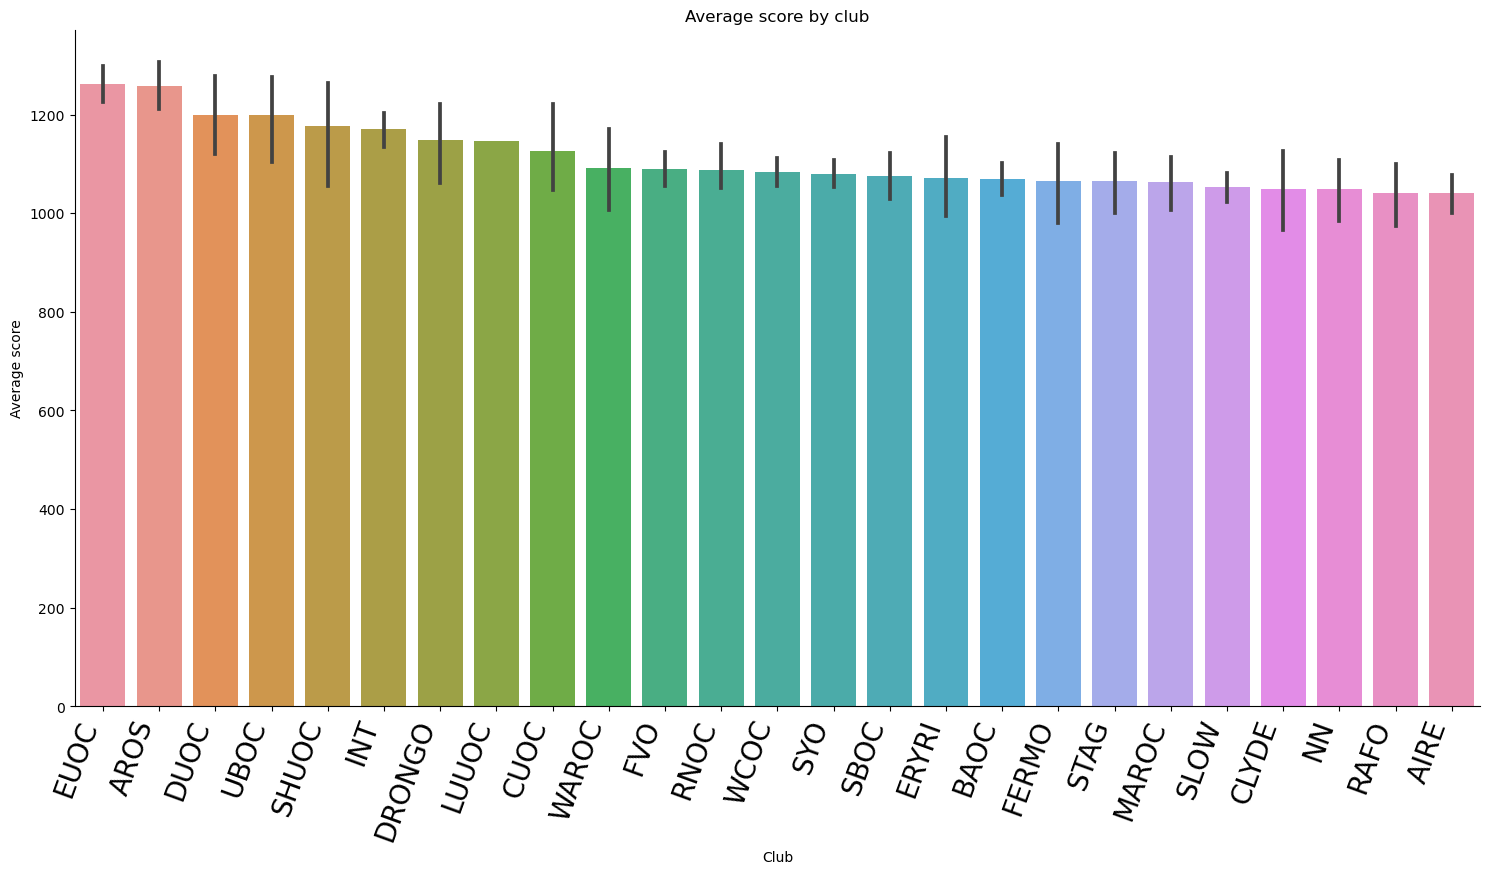

In [24]:

# Get the top 25 clubs based on the mean of 'Average' scores
top_25_clubs = df_zero_clubs_removed.groupby('Club')['Average'].mean().sort_values(ascending=False).index[:25]

# Filter the DataFrame to include only the top 25 clubs
df_top_25_clubs = df_zero_clubs_removed[df_zero_clubs_removed['Club'].isin(top_25_clubs)]

# Plotting the data for the top 25 clubs
sns.catplot(data=df_top_25_clubs,
            x="Club",
            y="Average",
            kind="bar",
            order=top_25_clubs,
            height=7.5,
            aspect=2)

plt.xlabel("Club")
plt.ylabel("Average score")
plt.title('Average score by club')
plt.xticks(rotation=70, fontsize=20, ha="right")
plt.show()

To test my hypothesis about the runners in university and university alumni clubs being younger, I plotted the average age by club. Again, there is too much data on this graph to enable detailed analysis, but the drastic drop in average age on the right hand side of the graph caught my attention.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



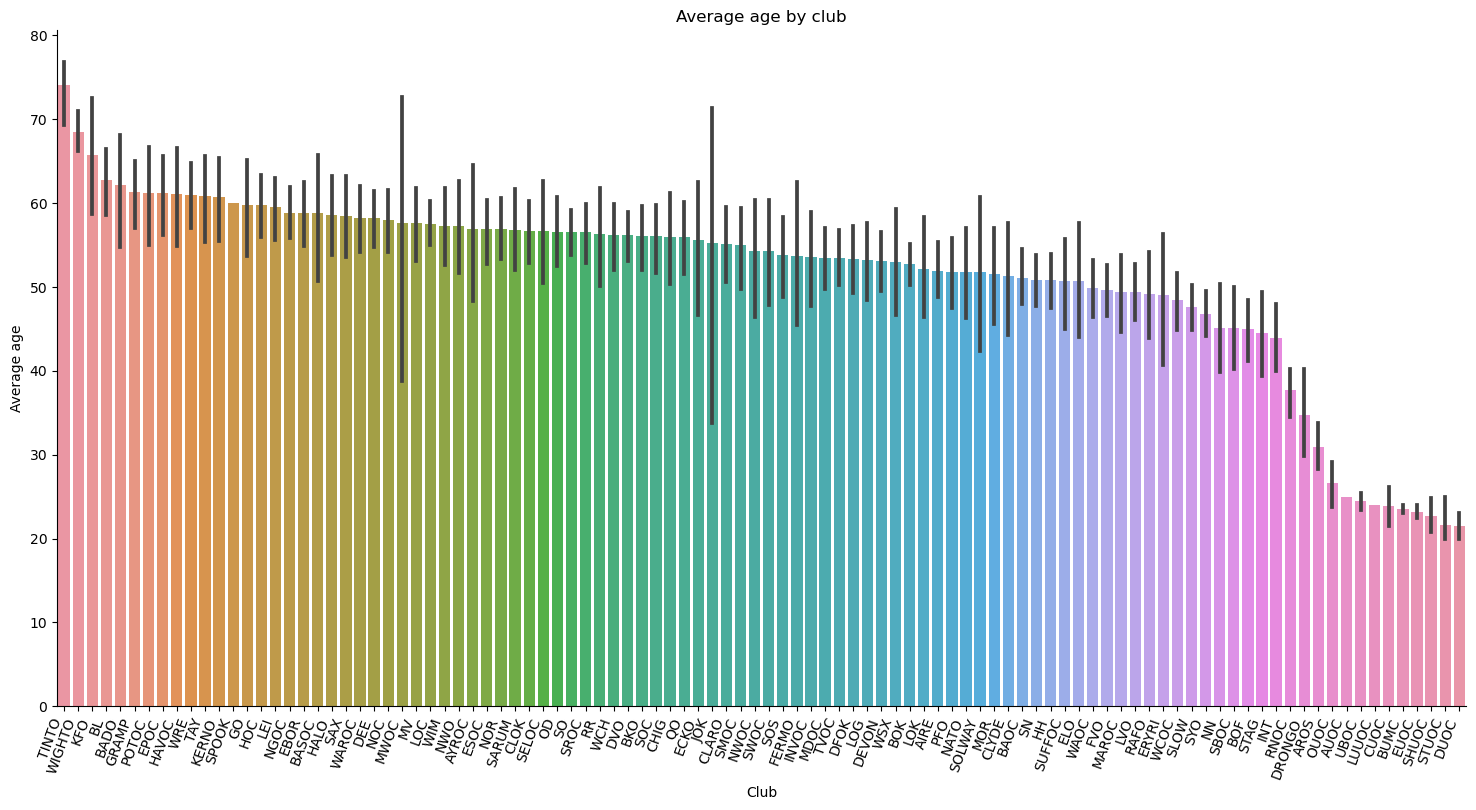

In [104]:
sns.catplot(data=df_zero_clubs_removed,
            x="Club",
            y="age",
            kind="bar",
            order = df_zero_clubs_removed.groupby('Club')['age'].mean().sort_values(ascending=False).index,
           height=7.5,
           aspect=2)
plt.xlabel("Club")
plt.ylabel("Average age")
plt.title('Average age by club')
plt.xticks(rotation=70, fontsize = 10, ha="right")
plt.show()

Another thing I noticed when looking at the graphs I had produced so far was the size of the error bars for mean average ranking score per club and mean age per club. This got me wondering about the numbers of ranked runners in each club, which is what I plotted next. The data shows that there is indeed a large span in the number of ranked runners in different clubs, with the range varying from one to more than 175. 

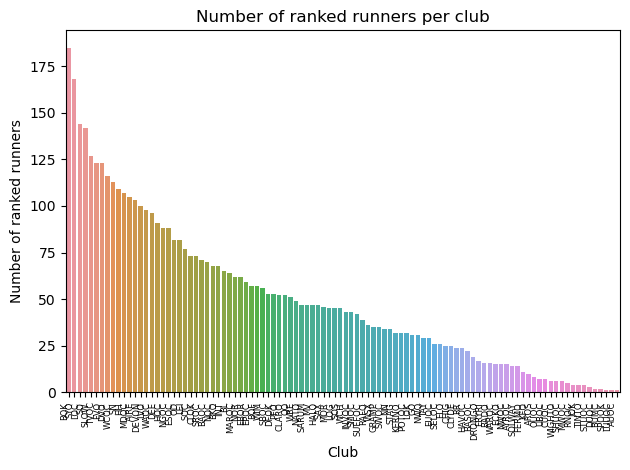

In [26]:
#plot the number of ranked runners per club

sns.countplot(data = df_zero_clubs_removed,
              x = 'Club',
              order = df_zero_clubs_removed['Club'].value_counts().index)
plt.xlabel("Club")
plt.ylabel("Number of ranked runners")
plt.title('Number of ranked runners per club')
plt.xticks(rotation=90, fontsize=6, ha='right')

# Adjust layout to prevent clipping of rotated tick labels
plt.tight_layout()
plt.show()

To bring all my observations, as well as lot of the learning from the bootcamp, together, I used `plotly` to build an interactive graph. To build this graph I created two new dataframes (club_mean and club_count) and then merged them into a new dataframe (merged_data) on ‘Club’ column, which I then used for plotting the graph. The graph displays the mean average ranking score as a function of mean age, grouped by club. Hovering over the datapoints will reveal the count of runners in each club. 

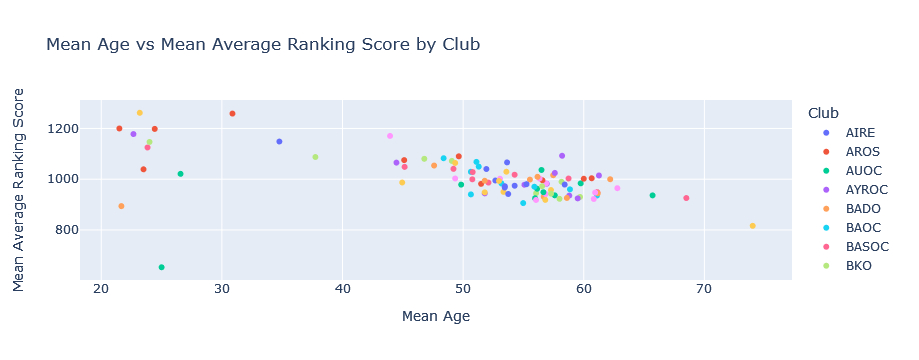

'fig.show()\n\nfig.write_html("Plotly.html")'

In [65]:
import plotly.express as px
import pandas as pd
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

#calculate the mean 'age' and 'Average' for each 'club'

club_mean = df_zero_clubs_removed.groupby('Club')[['age', 'Average']].mean().reset_index()

#count of data points in each club

club_count = df_zero_clubs_removed['Club'].value_counts().reset_index()
club_count.columns = ['Club', 'Count']

#merge the mean values and count data

merged_data = pd.merge(club_mean, club_count, on='Club')

#create a plot

fig = px.scatter(merged_data, x='age', y='Average', color='Club', size_max=30,
                 labels={'age': 'Mean Age', 'Average': 'Mean Average Ranking Score'},
                 title='Mean Age vs Mean Average Ranking Score by Club',
                 hover_name='Club',
                 hover_data={'Count': True}) 

iplot(fig)

"""fig.show()

fig.write_html("Plotly.html")"""